# Global Greenhouse Gas Emissions per Country

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
plt.style.use('dark_background')

## Mean Global Green House Gases Per Sector

In [24]:
df_GHG = pd.read_csv('Data/Global_GHG_Emissions_by_Sector.csv')
df_GHG

,Sub-sector,Share of global greenhouse gas emissions (%)
0,Road,11.9
1,Aviation,1.9
2,Rail,0.4
3,Pipeline,0.3
4,Ship,1.7
5,Residential,10.9
6,Commercial,6.6
7,Iron & Steel,7.2
8,Non-ferous metals,0.7
9,Machinery,0.5


### Bar Chart of Each Sector

In [53]:
slices = df_GHG['Share of global greenhouse gas emissions (%)']
labels = df_GHG['Sub-sector']
plt.bar(slices, labels=labels, wedgeprops={'edgecolor': 'black'})
plt.title("Impact of Global Green House Gases per Sector")
plt.tight_layout()
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

### Canada's Mean Greenhouse Gas Emission per sector

In [54]:
df_GHG_Can = pd.read_csv('Data/GHG_Emissions.csv')
df_GHG_Can = df_GHG_Can[df_GHG_Can['Entity'].isin(['Canada', 'World'])].drop(['Code'], axis=1)
df_GHG_Can.columns


Index(['Entity', 'Year', 'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat',
       'Fugitive emissions of greenhouse gases from energy production',
       'Greenhouse gas emissions from other fuel combustion',
       'Greenhouse gas emissions from bunker fuels'],
      dtype='object')

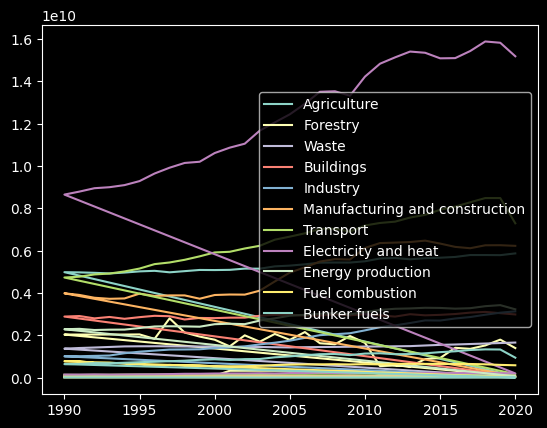

In [55]:
y = df_GHG_Can.loc[:, ['Greenhouse gas emissions from agriculture', 'Greenhouse gas emissions from land use change and forestry',
                       'Greenhouse gas emissions from waste',
                       'Greenhouse gas emissions from buildings',
                       'Greenhouse gas emissions from industry',
                       'Greenhouse gas emissions from manufacturing and construction',
                       'Greenhouse gas emissions from transport',
                       'Greenhouse gas emissions from electricity and heat',
                       'Fugitive emissions of greenhouse gases from energy production',
                       'Greenhouse gas emissions from other fuel combustion',
                       'Greenhouse gas emissions from bunker fuels']]
plt.plot(df_GHG_Can['Year'], y)
plt.legend(['Agriculture', 'Forestry',
            'Waste',
            'Buildings',
            'Industry',
            'Manufacturing and construction',
            'Transport',
            'Electricity and heat',
            'Energy production',
            'Fuel combustion',
            'Bunker fuels'],loc='right')
plt.show()

## Annual CO2 Emissions of Canada Vs. Each Continent

### Create a subset of the data frame

In [7]:
df_CO2 = pd.read_csv('Data/Annual_CO2_Emissions.csv')
df_compare = df_CO2[df_CO2['Entity'].isin(['Canada','World','Asia','Europe', 'North America', 'Oceania', 'Africa', 'South America'])]
df_compare = df_compare.drop(['Code'], axis=1).query('Year >= 1900 & Year <= 2022')
df_compare

,Entity,Year,Annual CO₂ emissions (per capita)
179,Africa,1900,0.016816
180,Africa,1901,0.028121
181,Africa,1902,0.041765
182,Africa,1903,0.056402
183,Africa,1904,0.063418
...,...,...,...
26329,World,2018,4.785001
26330,World,2019,4.770166
26331,World,2020,4.464730
26332,World,2021,4.654845


### Plot CO2 for each Continent vs Canada

In [12]:
df_World = df_compare.loc[(df_compare.Entity == 'World')]
df_NA = df_compare.loc[(df_compare.Entity == 'North America')]
df_EUR = df_compare.loc[(df_compare.Entity == 'Europe')]
df_Asia = df_compare.loc[(df_compare.Entity == 'Asia')]
df_Oceania = df_compare.loc[(df_compare.Entity == 'Oceania')]
df_Africa = df_compare.loc[(df_compare.Entity == 'Africa')]
df_SA = df_compare.loc[(df_compare.Entity == 'South America')]
df_Can = df_compare.loc[(df_compare.Entity == 'Canada')]


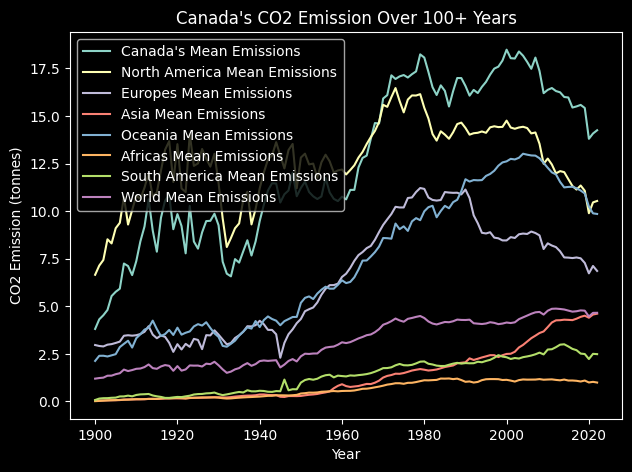

In [21]:
year_x = df_Can['Year']
Canada_y = df_Can['Annual CO₂ emissions (per capita)']
World_y = df_World['Annual CO₂ emissions (per capita)']
NA_y = df_NA['Annual CO₂ emissions (per capita)']
EU_y = df_EUR['Annual CO₂ emissions (per capita)']
Asia_y = df_Asia['Annual CO₂ emissions (per capita)']
Oceania_y = df_Oceania['Annual CO₂ emissions (per capita)']
Africa_y = df_Africa['Annual CO₂ emissions (per capita)']
SA_y = df_SA['Annual CO₂ emissions (per capita)']

plt.plot(year_x, Canada_y, label="Canada's Mean Emissions")
plt.plot(year_x, NA_y, label='North America Mean Emissions')
plt.plot(year_x, EU_y, label='Europes Mean Emissions')
plt.plot(year_x, Asia_y, label='Asia Mean Emissions')
plt.plot(year_x, Oceania_y, label='Oceania Mean Emissions')
plt.plot(year_x, Africa_y, label='Africas Mean Emissions')
plt.plot(year_x, SA_y, label='South America Mean Emissions')
plt.plot(year_x, World_y, label='World Mean Emissions')

plt.title("Canada's CO2 Emission Over 100+ Years")
plt.ylabel('CO2 Emission (tonnes)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout(pad=1)
plt.show()